In [7]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt

In [30]:
random_state = 71
n_samples = 100

X, y = datasets.make_blobs(centers = 5, n_features = 3, n_samples=n_samples, random_state=random_state, center_box=(-20.0,20.0))

In [31]:
ground_truth = np.load('../data/synthetics_31.npy')

y_true = []
cts_true = []
for i in range(len(ground_truth)):

    y_true += [i]*len(ground_truth[i])
    cts_true.append(len(ground_truth[i]))


X = np.concatenate(ground_truth, axis = 0)
y_true = np.array(y_true)

In [33]:
def determine_alignment(X1: np.ndarray,
                        X2: np.ndarray,
                        seed: int
                        ):
    
    '''
    Determine the alignment of two point clouds based on their two leading principal components

    Parameters
    ----------
    X1, X2: np.ndarray
        The two point clouds as arrays of shape (n_samples, n_dim)
    
    seed: int
        The random seed

    Returns
    --------
    align_score: float
        The alignment score of the point clouds. Is calculated as the sum of 
        the dot products of their normalized leading principal components

    '''

    if X1.shape[1] != X2.shape[1]:
        raise ValueError('Point clouds must have the same number of features')

    # Determine the leading 2 principal components of each cloud
    pca1 = PCA(n_components = 2, 
              random_state = seed)
    pca2 = PCA(n_components = 2, 
              random_state = seed)
    
    comps1 = pca1.fit(X1).components_
    comps2 = pca2.fit(X2).components_

    # normalize the components
    comps1[0] /= np.linalg.norm(comps1[0])
    comps1[1] /= np.linalg.norm(comps1[1])
    comps2[0] /= np.linalg.norm(comps2[0])
    comps2[1] /= np.linalg.norm(comps2[1])

    # calculate alignment of the components
    # use the max to cover case where 1-2 and 2-1 are well aligned
    align_score = max( sum(np.abs(np.sum(comps1 * comps2, axis = 1)))/2, \
                      sum(np.abs(np.sum(comps1 * comps2[::-1], axis = 1)))/2)

    return align_score

In [34]:
for i in range(4):
    for j in range(i+1,4):

        sc =  determine_alignment(X[y_true==i], X[y_true==j], random_state)
        print(f'Alignment of {i} and {j}: {sc}')


Alignment of 0 and 1: 0.7579282709605242
Alignment of 0 and 2: 0.9309800487780031
Alignment of 0 and 3: 0.7086934474151865
Alignment of 1 and 2: 0.7658817535023805
Alignment of 1 and 3: 0.6567708937108248
Alignment of 2 and 3: 0.9098959279246237


## Behavior of the dot product in 2D

In [23]:
n_pts = 40

angle = np.linspace(0, np.pi, n_pts)
y = np.abs(np.cos(angle))

Text(0.5, 0, 'Angle between the components')

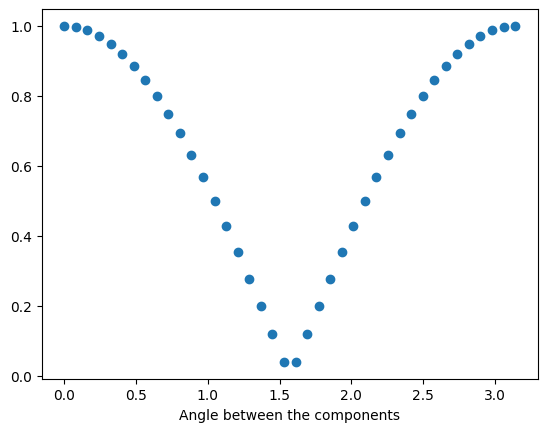

In [27]:
plt.scatter(angle, y)
plt.xlabel('Angle between the components')